In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles_nov_2019.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [3]:
net_data= pd.read_csv("../input/netflix-shows/netflix_titles_nov_2019.csv")

In [4]:
net_data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
net_data.index

RangeIndex(start=0, stop=5837, step=1)

In [6]:
net_data.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [7]:
net_data['date_added'] = pd.to_datetime(net_data['date_added'])
net_data['year_added'] = net_data['date_added'].dt.year
net_data['month_added'] = net_data['date_added'].dt.month

In [8]:
net_data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN


In [9]:
net_data['season_count'] = net_data.apply(lambda x:x['duration'].split("")[0] if "season" in x['duration'] else "" ,axis=1)



In [10]:
net_data['duration'] = net_data.apply(lambda x:x['duration'].split(" ")[0] if "season" not in ['duration'] else "" , axis =1)

In [11]:
data =net_data.groupby(['country','release_year'])
data.first()

show_id                   title  \
country      release_year                                     
Argentina    1985          70266171    Esperando La Carroza   
             1998          70041893      Pizza, birra, faso   
             2006          70074315  Chronicle of an Escape   
             2007          70084328              The Aerial   
             2015          80087857                Creators   
...                             ...                     ...   
Vietnam      2014          81002601        Conjuring Spirit   
             2015          81002592                 Jackpot   
             2016          80203776           Bitcoin Heist   
             2019          81075519                   Furie   
West Germany 1977          80106791       Hitler - A Career   

                                                        director  \
country      release_year                                          
Argentina    1985                                Alejandro Doria   
             1998          Israel Adrián Caetano, Bruno Stagnaro   
             2006                          Israel Adrián Caetano   
             2007                                  Esteban Sapir   
             2015                                    Pablo Parés   
...                                                          ...   
Vietnam      2014                                    Van M. Pham   
             2015                                  Dustin Nguyen   
             2016                                       Ham Tran   
             2019                                    Le Van Kiet   
West Germany 1977          Joachim Fest, Christian Herrendoerfer   

                                                                        cast  \
country      release_year                                                      
Argentina    1985          Luis Brandoni, China Zorrilla, Antonio Gasalla...   
             1998          Héctor Anglada, Jorge Sesán, Pamela Jordán, Ad...   
             2006          Rodrigo de la Serna, Pablo Echarri, Nazareno C...   
             2007          Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...   
             2015                 Fabio Aste, Héctor Segura, Sebastian Rosas   
...                                                                      ...   
Vietnam      2014          Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...   
             2015                Chi Tai, Lan Ngoc, Dustin Nguyen, Thu Trang   
             2016          Kate Nhung, Thanh Pham, Petey Majik Nguyen, Su...   
             2019          Ngo Thanh Van, Phan Thanh Nhien, Mai Cat Vi, T...   
West Germany 1977                                                        NaN   

                          date_added rating duration  \
country      release_year                              
Argentina    1985         2018-07-15     NR       95   
             1998         2018-03-15  TV-MA       81   
             2006         2018-06-15      R      104   
             2007         2018-04-01  TV-MA       99   
             2015         2017-01-13   TV-Y        2   
...                              ...    ...      ...   
Vietnam      2014         2018-08-28  TV-MA      112   
             2015         2018-10-06  TV-14       92   
             2016         2017-09-02  TV-14      116   
             2019         2019-09-25  TV-MA       97   
West Germany 1977         2017-02-10  TV-MA      150   

                                                                   listed_in  \
country      release_year                                                      
Argentina    1985                Comedies, Cult Movies, International Movies   
             1998                               Dramas, International Movies   
             2006                    Dramas, International Movies, Thrillers   
             2007             Dramas, International Movies, Sci-Fi & Fantasy   
             2015                        Kids' TV, Spanish-Language TV Sh

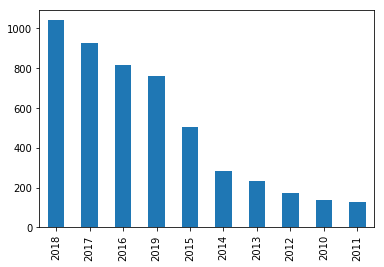

In [12]:
net_data['release_year'].value_counts().head(10).plot.bar()

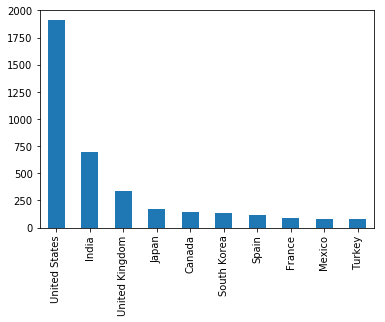

In [13]:
net_data['country'].value_counts().head(10).plot.bar()

In [14]:
net_data['type'].value_counts()

Movie      3939
TV Show    1898
Name: type, dtype: int64

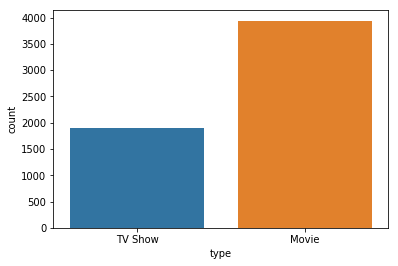

In [15]:
sns.countplot(x='type',data=net_data)

In [16]:
net_data['rating'].value_counts()

TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

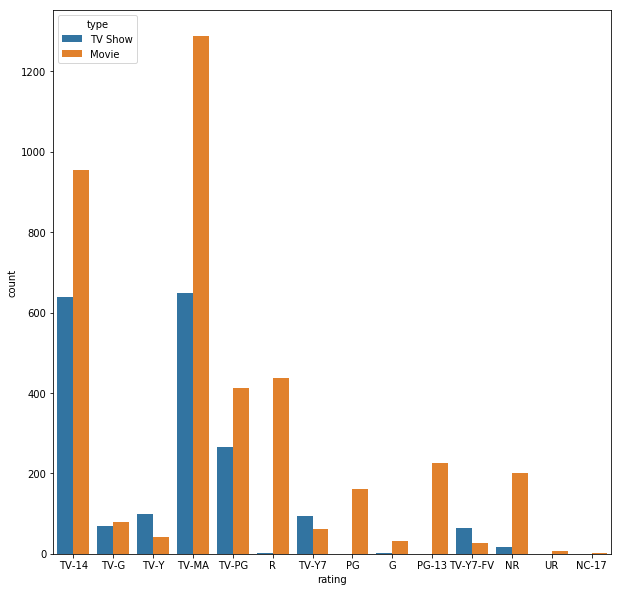

In [17]:
plt.figure(figsize=[10,10])
sns.countplot(x='rating',data=net_data, hue="type")

In [18]:
d1 = net_data[net_data['type']=="TV Show"]
d2 = net_data[net_data['type']=="Movie"]

col="year_added"

t1 = d1[col].value_counts().reset_index()
t1 = t1.rename(columns={col:"count","index":col})
t1['percent']=t1['count'].apply(lambda x:100*x/sum(t1['count']))
t1=t1.sort_values(col)

t2 = d2[col].value_counts().reset_index()
t2 = t2.rename(columns={col:"count","index":col})
t2['percent']=t1['count'].apply(lambda x:100*x/sum(t1['count']))
t2=t2.sort_values(col)

trace1 = go.Scatter(x=t1[col],y=t1["count"],name='TV Show', marker=dict(color="#a678de"))
trace2 = go.Scatter(x=t2[col],y=t2["count"],name='Movie', marker=dict(color="#6ad49b"))
data = [trace1,trace2]
layout = go.Layout(title="content over the year",legend=dict(x=0.1,y=1.1,orientation='h'))
fig = go.Figure(data,layout=layout)
fig.show()

In [19]:
s =net_data.sort_values("release_year",ascending=True)
s = s[s['duration']!=" "]
s[['title',"release_year"]][:10]

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945


In [20]:
tag = "india"
net_data['relevent']=net_data['country'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0 )
small = net_data[net_data['relevent']==1]
small[["title","director","cast","country","date_added","release_year","rating"]]

,title,director,cast,country,date_added,release_year,rating
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14
24,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019-11-27,2019,TV-14
34,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,2019-11-25,2019,TV-MA
69,Dorasaani,KVR Mahendra,"Anand Deverakonda, Shivatmika Rajasekhar, Kann...",India,2019-11-20,2019,TV-14
78,Mallesham,Raj R,"Jhansi, Priyadarshi Pullikonda, Ananya Nagalla",India,2019-11-20,2019,TV-PG
...,...,...,...,...,...,...,...
5478,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2016-08-20,2015,TV-PG
5485,John & Jane,Ashim Ahluwalia,NaN,India,2016-08-15,2005,TV-14
5530,Brahman Naman,Qaushiq Mukherjee,"Shashank Arora, Tanmay Dhanania, Chaitanya Var...","India, United Kingdom",2016-07-06,2016,TV-MA
5545,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...","Anshuman Jha, Rajat Kapoor, Pooja Ruparel, Pia...",India,2016-07-01,2015,NR


In [21]:
small = net_data.sort_values("release_year",ascending=True)
small = small[small['season_count']!=" "]
small[["title","release_year"]][:15]

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945


In [22]:
col="release_year"

t1 = d1[col].value_counts().reset_index()
t1 = t1.rename(columns={col:"count","index":col})
t1['percent']=t1['count'].apply(lambda x:100*x/sum(t1['count']))
t1=t1.sort_values(col)

t2 = d2[col].value_counts().reset_index()
t2 = t2.rename(columns={col:"count","index":col})
t2['percent']=t1['count'].apply(lambda x:100*x/sum(t1['count']))
t2=t2.sort_values(col)

trace1 = go.Scatter(x=t1[col],y=t1["count"],name='TV Show', marker=dict(color="#a678de"))
trace2 = go.Scatter(x=t2[col],y=t2["count"],name='Movie', marker=dict(color="#6ad49b"))
data = [trace1,trace2]
layout = go.Layout(title="content over the year",legend=dict(x=0.1,y=1.1,orientation='h'))
fig = go.Figure(data,layout=layout)
fig.show()

In [23]:
tag = "Stand-Up Comedy"
net_data["relevent"] = net_data["listed_in"].fillna("").apply(lambda x:1if tag.lower() in x.lower() else 0 )
small=net_data[net_data['relevent']==1]
small[small["country"]=='India'][["title","country","release_year"]].head(10)

,title,country,release_year
4533,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
4855,Gangs of Hassepur,India,2014
